In [10]:
import pickle
with open('./models_res/180/180_res_three_parts_without_center.pkl', 'rb') as f:
#with open('./models_res/180/180_res_sigma_half.pkl', 'rb') as f:
    res = pickle.load(f)

In [11]:
import numpy as np

In [18]:
len(res['3'][7])#[:1000]#[-1000:]

1592

In [17]:
for i, clust in enumerate(res['3']):
    print('**********')
    print(i)
    print('----------')
    print(', '.join([w.split('_')[0] for w in clust[:30]]))
    print('----------')
    print(', '.join([w.split('_')[0] for w in clust[-30:]]))
    print('**********')

**********
0
----------
сей, сие, добродетель, токмо, чувствование, наставление, прилежание, поелику, житие, кой, оный, слог, похвала, любовь, премудрость, благость, дар, изъяснение, совершенство, воображение, опытность, благодеяние, живость, естество, предмет, дарование, доверенность, несчастие, ученость, дружество
----------
базилик, персонаж, неуважение, эпилог, тяжеловесность, этимология, невыгода, безукоризненность, неумелость, резонерство, новый, неясность, расстройство, удача, положенье, психологизм, единообразие, обер-прокурора, заразительность, реплика, эстетик, править, проникновенность, немилость, уловление, амплуа, констатирование, орфография, обиход, гностик
**********
**********
1
----------
рукоприкладство, мезальянс, инстинкт, открытость, запрещение, антиномий, препирательство, тюрка, ненасилие, хозяйничанье, авангардизм, передвижник, доминант, глашатай, угасание, пожирание, иррационализм, опасение, обмирщение, старообрядчество, несогласованность, скепсис, апогей, рюрик

In [53]:
import pymorphy2
morph = pymorphy2.MorphAnalyzer()

In [54]:
all_anim_list = []
anim_list = []
for clust in res['3']:
    clust_list = []
    for word in clust:
        parsed_anim = morph.parse(word.split('_')[0])[0].tag.animacy
        clust_list.append(parsed_anim)
        if parsed_anim == 'anim':
            all_anim_list.append(word.split('_')[0])
    anim_list.append(clust_list)

In [55]:
with open('animacy.txt', 'a', encoding='utf8') as f:
    f.write('\n'.join(all_anim_list))

In [36]:
with open('animacy.txt', 'r', encoding='utf8') as f:
    all_anim = f.read().split('\n')

In [40]:
with open('animacy.txt', 'w', encoding='utf8') as f:
    f.write('\n'.join(set(all_anim)))

In [39]:
len(all_anim)

23645

In [38]:
len(set(all_anim))

15744

In [20]:
all_anim

['натура',
 'государь',
 'святитель',
 'божество',
 'летописец',
 'наставник',
 'судия',
 'существо',
 'императрица',
 'духовник',
 'иконописец',
 'слушатель',
 'мореплаватель',
 'подвижник',
 'ученик',
 'граф',
 'апостол',
 'пастырь',
 'адъюнкт',
 'неприятель',
 'воспитанник',
 'диавол',
 'натуралист',
 'биограф',
 'читатель',
 'цесаревич',
 'романист',
 'пресвитер',
 'животное',
 'подражатель',
 'посланник',
 'герцог',
 'генерал-прокурор',
 'магистр',
 'попечитель',
 'венценосец',
 'стоик',
 'евангелист',
 'знаток',
 'ребенок',
 'собеседник',
 'математика',
 'человек',
 'нестор',
 'язычник',
 'родитель',
 'учитель',
 'воспитатель',
 'римлянин',
 'владыка',
 'иоанн',
 'предок',
 'повествователь',
 'профессора',
 'кесарь',
 'архимандрит',
 'настоятельница',
 'алхимик',
 'правительница',
 'философ',
 'архиерей',
 'актер',
 'богослов',
 'супруги',
 'историограф',
 'грек',
 'податель',
 'завещатель',
 'творец',
 'коринфянин',
 'глинка',
 'иеромонах',
 'опекун',
 'современник',
 'епископ',

In [14]:
morph.parse('жмурика')[0].tag.animacy

'anim'

In [15]:
anim_list = []
for clust in res['3']:
    clust_list = []
    for word in clust:
        clust_list.append(morph.parse(word.split('_')[0])[0].tag.animacy)
    anim_list.append(clust_list)

In [27]:
from collections import Counter
for i, el in enumerate(anim_list):
    anim_list[i] = Counter(el)

In [31]:
for i in anim_list:
    print(i['inan'], i['anim'], i[None])

1369 149 72
1285 289 17
1230 337 24
1473 78 40
864 534 192
786 641 165
1234 211 145
1283 227 82


<AxesSubplot:>

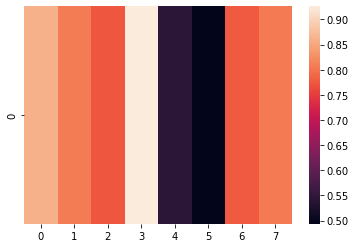

In [33]:
import seaborn as sns
sns.heatmap([[i['inan'] / (i['inan'] + i['anim'] + i[None]) for i in anim_list]])

<AxesSubplot:>

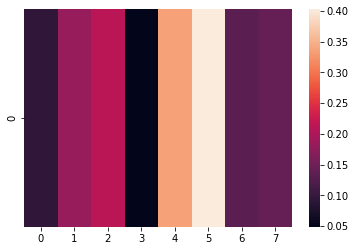

In [34]:
sns.heatmap([[i['anim'] / (i['inan'] + i['anim'] + i[None]) for i in anim_list]])

In [69]:
res['1'][-1][::100]

['время_NOUN',
 'класс_NOUN',
 'противник_NOUN',
 'организм_NOUN',
 'контроль_NOUN',
 'стоимость_NOUN',
 'спутник_NOUN',
 'заказ_NOUN',
 'затылок_NOUN',
 'сходство_NOUN',
 'окружение_NOUN',
 'пристань_NOUN',
 'лужа_NOUN',
 'расстройство_NOUN',
 'огурец_NOUN',
 'слог_NOUN',
 'сукно_NOUN',
 'ванная_NOUN',
 'занавеска_NOUN',
 'интерпретация_NOUN',
 'посев_NOUN',
 'штора_NOUN',
 'плот_NOUN',
 'толща_NOUN',
 'искажение_NOUN',
 'национализм_NOUN',
 'полушарие_NOUN',
 'комбайн_NOUN',
 'морковь_NOUN',
 'испарение_NOUN',
 'разлив_NOUN',
 'подножка_NOUN',
 'жесткость_NOUN',
 'червяк_NOUN',
 'конвоир_NOUN',
 'клинок_NOUN',
 'десантник_NOUN',
 'искорка_NOUN',
 'клубника_NOUN',
 'периметр_NOUN',
 'стимулирование_NOUN',
 'баррель_NOUN',
 'тара_NOUN',
 'вуаль_NOUN',
 'рассада_NOUN',
 'кружева_NOUN',
 'психотерапия_NOUN',
 'энцефалит_NOUN',
 'заслонка_NOUN',
 'червячок_NOUN',
 'обелиск_NOUN',
 'зернышко_NOUN',
 'наколка_NOUN',
 'низменность_NOUN',
 'перекос_NOUN',
 'уродец_NOUN',
 'лесозаготовка_NOUN'

100%|██████████████████████████████████████████████████████████████████████████████████| 22/22 [00:01<00:00, 12.90it/s]


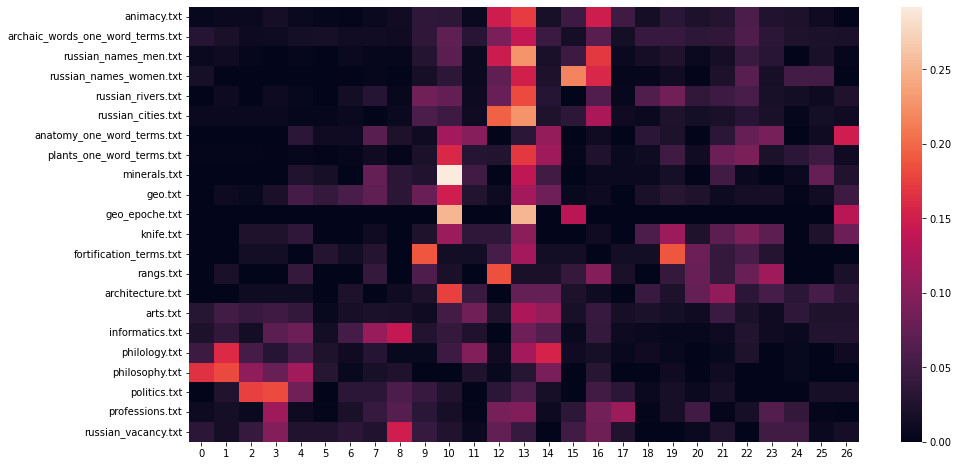

In [160]:
from algo import *
get_dict_histplot(res['3'])

100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 64.42it/s]


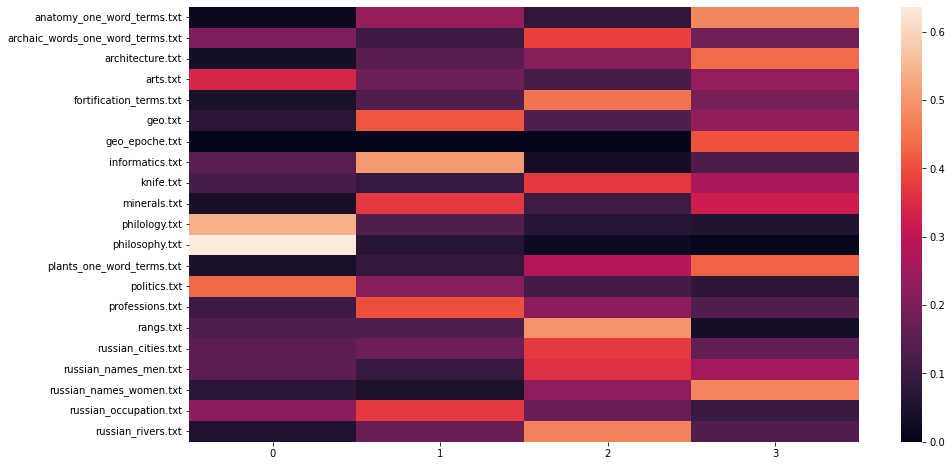

In [15]:
get_dict_histplot(res['2'])

100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 91.86it/s]


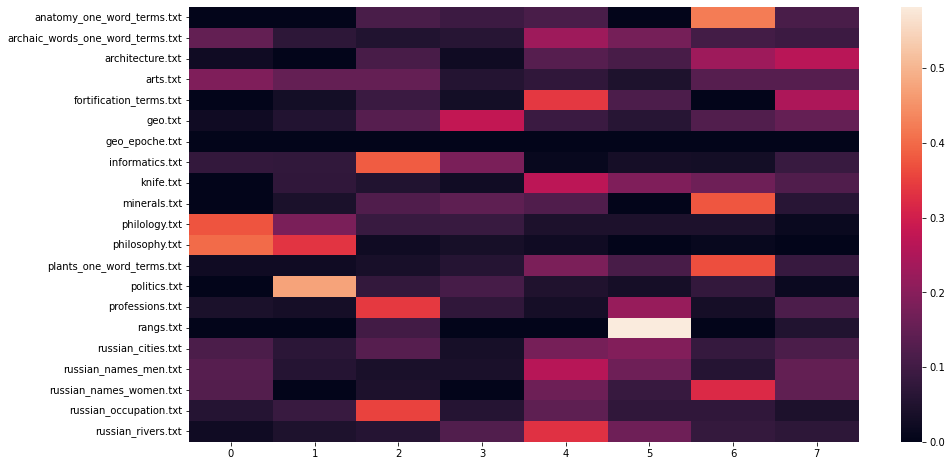

In [16]:
get_dict_histplot(res['3'])

100%|█████████████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 117.33it/s]


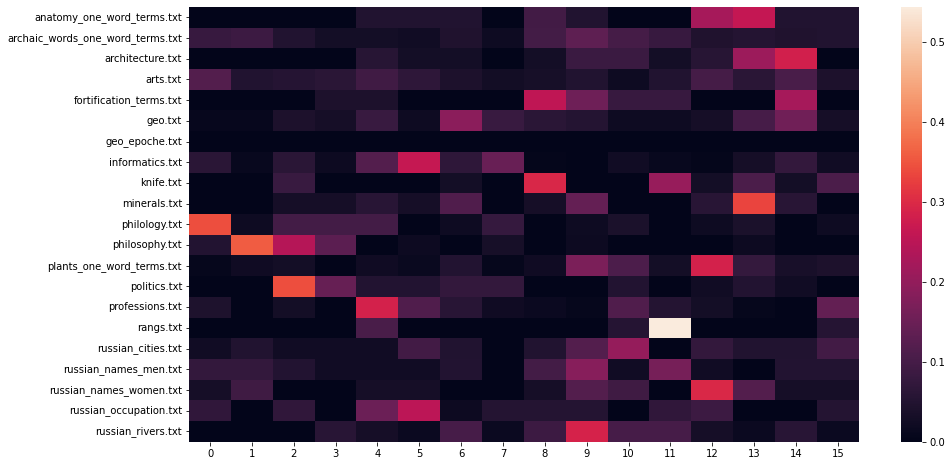

In [5]:
from algo import *
get_dict_histplot(res['4'])

100%|█████████████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 114.76it/s]


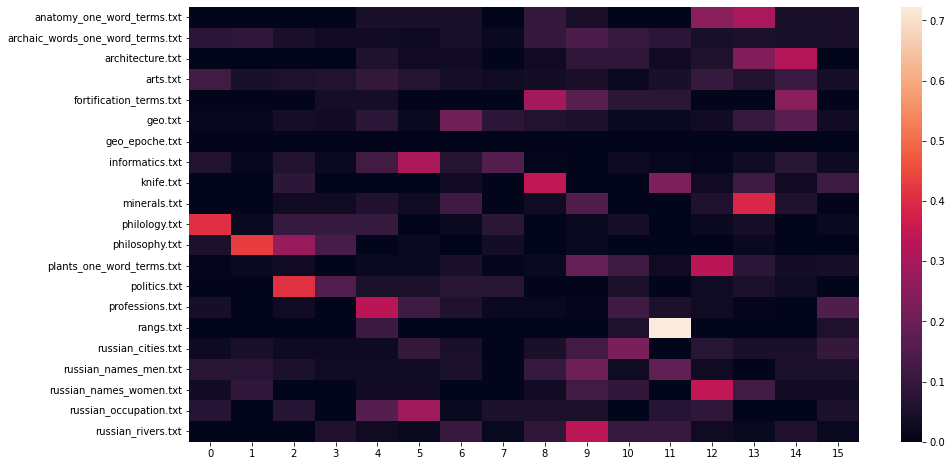

In [5]:
from algo import *
get_dict_histplot(res['4'])

100%|█████████████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 108.81it/s]


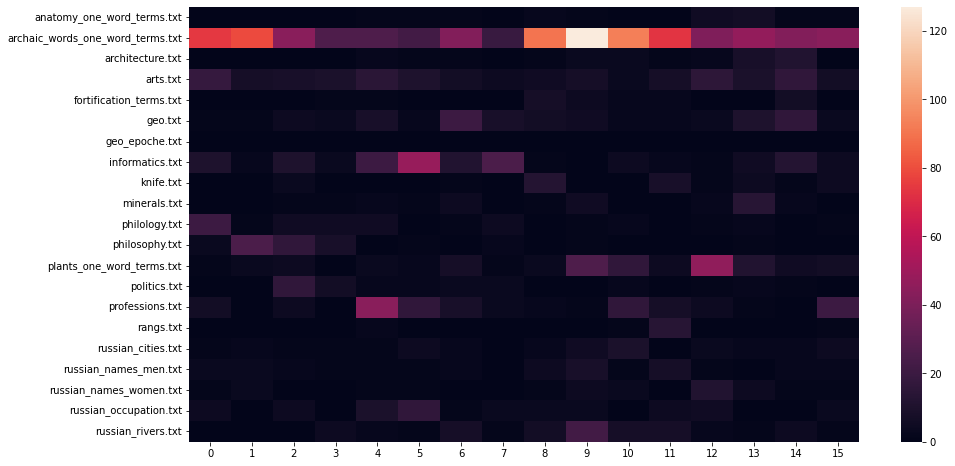

In [4]:
from algo import *
get_dict_histplot(res['4'])

In [8]:
with open('./dicts/archaic_words_one_word_terms.txt', 'r', encoding='utf8') as f:
    archaic_words = preproc(f.read())

In [10]:
for i, clust in enumerate(res['4'][:8]):
    print(i)
    for word in clust:
        word = word.split('_')[0]
        if word in archaic_words:
            print(word)
            
    print('***************\n')

0
замечание
отзыв
примечание
словесность
разбор
книга
беседа
публика
трактат
должность
уложение
неудовольствие
государь
стих
чин
соображение
этикет
лексикон
язык
посланник
доверенность
упущение
имение
узаконение
погрешность
изъяснение
звание
содержание
купечество
повеление
предписание
штрих
рассуждение
препинание
стихотворство
переложение
величество
учитель
шляхетство
достоинство
панегирик
слово
пререкание
правило
предположение
разыскание
честь
вольность
тот
речение
длиннота
повествователь
наклонение
польза
благорасположение
недоимка
кой
тяжба
согласие
благоусмотрение
повторение
художество
благочиние
неуменье
краткий
сочинительство
вид
начертание
соизволение
немилость
положенье
присутствие
пеня
противу
***************

1
натура
заточение
любомудрие
труд
мерило
недостоинство
убиение
существенность
уничижение
смиренномудрие
слышание
несчастие
кесарь
дотоле
наш
судия
магнетизм
смысл
позыв
преуспеяние
паства
прелюбодеяние
клятва
ревность
седмица
самый
мужество
причастник
премудрость
состоя

In [10]:
res['4'][11]

array(['орловец_NOUN', 'повозка_NOUN', 'подьячий_NOUN', 'каюра_NOUN',
       'просека_NOUN', 'ихний_NOUN', 'животина_NOUN', 'егор_NOUN',
       'батенька_NOUN', 'теплушка_NOUN', 'ездка_NOUN', 'собака_NOUN',
       'лентяй_NOUN', 'подмога_NOUN', 'михайла_NOUN', 'егерь_NOUN',
       'дьячка_NOUN', 'опушка_NOUN', 'тятя_NOUN', 'жердь_NOUN',
       'степенство_NOUN', 'брательник_NOUN', 'приступка_NOUN',
       'караулка_NOUN', 'тятенька_NOUN', 'капельмейстер_NOUN',
       'перебранка_NOUN', 'землячок_NOUN', 'подпасок_NOUN', 'сенцы_NOUN',
       'букварь_NOUN', 'берейтор_NOUN', 'куды_NOUN', 'матка_NOUN',
       'гребец_NOUN', 'белоручка_NOUN', 'упряжь_NOUN', 'недолга_NOUN',
       'гордей_NOUN', 'ярыг_NOUN', 'песенник_NOUN', 'гуж_NOUN',
       'боров_NOUN', 'бабка_NOUN', 'бабки_NOUN', 'ревком_NOUN',
       'малый_NOUN', 'картежник_NOUN', 'объездчик_NOUN', 'цеп_NOUN',
       'крылечко_NOUN', 'выпороть_NOUN', 'шасть_NOUN', 'валек_NOUN',
       'дворянчик_NOUN', 'сибиряк_NOUN', 'степанида_NOUN'

In [36]:
with open('REVERSE.txt', 'r', encoding='utf8') as f:
    reverse_words = f.read().split('\n')

In [43]:
import re

without_words = []
for word in reverse_words:
    if re.match('^без.+(и|ы)й$', word):
        without_words.append(word)

In [48]:
without_words[40][-3]

'н'

In [49]:
ailen_words = []
non_ailen_wors = []
for word in without_words:
    if word[-3] == 'н':
        ailen_words.append(word)
    else:
        non_ailen_wors.append(word)

In [50]:
non_ailen_wors

['безногий',
 'безрогий',
 'безликий',
 'безрукий',
 'безъязыкий',
 'безверхий',
 'безухий',
 'бездействующий',
 'беззубый',
 'безглавый',
 'безрасчетливый',
 'беззастенчивый',
 'безытоговый',
 'безвизовый',
 'безголовый',
 'безбровый',
 'безыскровый',
 'безрельсовый',
 'безбородый',
 'безглазый',
 'безмозглый',
 'безволосый',
 'безголосый',
 'безносый',
 'безусый',
 'безлистый',
 'безостый']

In [ ]:
import seaborn as sns
sns.heatmap()

In [8]:
len(res['3'][1])

1591